In [1]:
import os,sys,inspect
currentdir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
parentdir = os.path.dirname(currentdir)
sys.path.insert(0,parentdir) 

In [2]:
from cipher.caesar import *
from cipher.affine import *
from cipher.keyword_cipher import *
from cipher.column_transposition import *
from cipher.vigenere import *
from support.text_prettify import *
from support.utilities import *
from support.plot_frequency_histogram import *
import re

In [3]:
challenge_number = 8
plaintext_a_filename = f'{challenge_number}a.plaintext'
plaintext_b_filename = f'{challenge_number}b.plaintext'
ciphertext_a_filename = f'{challenge_number}a.ciphertext'
ciphertext_b_filename = f'{challenge_number}b.ciphertext'

In [4]:
ca = open(ciphertext_a_filename).read()
cb = open(ciphertext_b_filename).read()

rwa = wcat(cat(reversed(w)) for w in ca.split())
ra = cat(reversed(ca))
sca = sanitise(ca)
rsca = cat(reversed(sca))
pca = letters(ca)
pta = depunctuate(ca)

scb = sanitise(cb)
pcb = letters(cb)
rscb = cat(reversed(scb))

/usr/local/lib/python3.6/dist-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


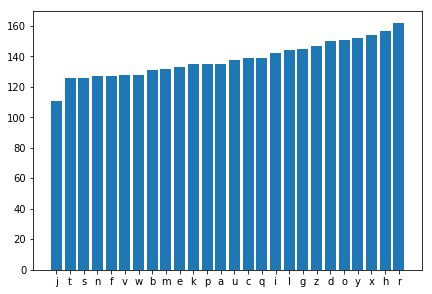

In [5]:
fc = collections.Counter(sca)
plot_frequency_histogram(fc, sort_key=fc.get)

In [6]:
k_a, score_b = vigenere_frequency_break(sca, fitness=Ptrigrams, max_key_length=26)
print(k_a, '\n')
pa = vigenere_decipher(sca, k_a)
pa

abcdefghijklmnopqrstuvwxyz 



'harryiputtogetherateamofwomenfromthecomputingdivisionhereatkennedyandwehavespentmostofthelasteighteenmonthscombingthroughmissionfilesandcomputerprintoutslookingformorecluestothesourceoftheoxygentankexplosiononboardapolloxiiiandithinkwehavefinallyworkedoutwhathappenedthetankcontainingthesourceoftheexplosionwasoriginallyinstalledinapolloxbutremovedformodificationduringthatprocessitgotdroppedsoitwasheldbackforfurthertestsandareplacementfittedforthatflightonceithadpassedinspectionthetankwasreturnedtoserviceandearmarkedforodysseyfurtherupgradeswerecarriedouttoallowittorunoffgroundpowerduringfitoutattwicethespaceshipvoltageandthehigherpowerwasusedtoboiloffexcessoxygenduringgroundtestsunfortunatelyitlookslikethethermostaticswitchesinthetankwereoverlookedduringthevoltageupgradeandourbestguessisthattheyfusedclosedduringtheboiloffallowingthetemperaturetorisetooverathousanddegreesyoumightthinkthetestengineerswouldhavenoticedthatbutsincethetankoperatingtemperaturewassupposedtobesomewherewellbelow

In [7]:
print(lcat(tpack(segment(pa))))

harry i put together a team of women from the computing division here at kennedy and we have spent
most of the last eighteen months combing through mission files and computer printouts looking for
more clues to the source of the oxygen tank explosion onboard apollo xiii and i think we have
finally worked out what happened the tank containing the source of the explosion was originally
installed in apollo x but removed for modification during that process it got dropped so it was held
back for further tests and a replacement fitted for that flight once it had passed inspection the
tank was returned to service and earmarked for odyssey further upgrades were carried out to allow it
to runoff ground power during fit out at twice the spaceship voltage and the higher power was used
to boil off excess oxygen during ground tests unfortunately it looks like the thermostatic switches
in the tank were overlooked during the voltage upgrade and our best guess is that they fused closed
during the boi

In [8]:
open(plaintext_a_filename, 'w').write(lcat(tpack(segment(pa))))

4375